In [1]:
import os
import sys
sys.path.append("/home/martin/Work/Qutip/modules")
import numpy as np
import math, cmath
import numpy.linalg as lin
import qutip
import Tomomod as Tm
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
P0 = 0.
dP = 0.1
nP = 50
Ps = np.zeros(nP)
Dom = np.zeros(nP)
cDom = np.zeros(nP)
sDom = np.zeros(nP)
for i in range(nP):
    P = P0 + float(i)*dP
    Ps[i] = P
    Do = Tm.Domega(P)
    Dom[i] = Do * 180./math.pi
    cDom[i] = math.cos(Do)
    sDom[i] = math.sin(Do)


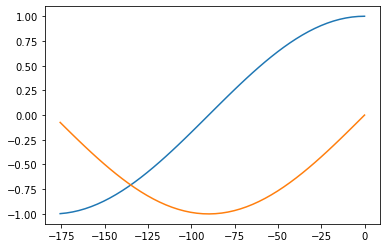

In [3]:
# Plotting Domega vs P
fig, ax = plt.subplots()
ax.plot(Dom, cDom, Dom, sDom)
plt.show()

In [4]:
print(Tm.DomegaStar()*180./math.pi, Tm.Pstar())

95.85670190991829 2.6726819190994378


In [5]:
print(math.cos(Tm.DomegaStar()))

-0.10204081632653056


In [6]:
print(math.sin(Tm.DomegaStar()))

0.9947802128125666


In [7]:
cps = Tm.cosPhiS()
sps = Tm.sinPhiS()
tps = Tm.tanPhiS()
print(cps, 180./math.pi*math.acos(cps))
print(sps, 180./math.pi*math.asin(sps))
print(tps, 180./math.pi*math.atan(tps))

-0.31943828249997 108.62895800065621
-0.947607082958686 -71.37104199934386
2.9664793948382657 71.3710419993438


In [8]:
print(180.-108.62895800065621)

71.37104199934379


In [9]:
phis = math.asin(sps)
phis = -math.acos(cps)
print(phis, 180./math.pi * phis)

-1.8959329801220874 -108.62895800065621


In [10]:
n = 0
B = 1.
Trot = (6.*B)**(-1.)
T1 = float(n) * math.pi / (3.*B) - phis / (6.*B)
T2 = float(n) * math.pi / (3.*B) + (0.5*math.pi - phis) / (6.*B)
T2 = T1 + math.pi/(12.*B)

In [11]:
print(T1/Trot, T2/Trot)
print(T1, T2)

1.8959329801220874 3.4667293069169838
0.3159888300203479 0.5777882178194973


# 

In [12]:
print(math.cos(phis + 6.*B*T1))
print(math.sin(phis + 6.*B*T2))

1.0
1.0


In [13]:
t0 = 0.
dt = 0.01
nt = 200
times = np.zeros(nt)
ct = np.zeros(nt)
st = np.zeros(nt)
for i in range(nt):
    t = t0 + float(i)*dt
    times[i] = t
    ct[i] = math.cos(phis + 6.*B*t)
    st[i] = math.sin(phis + 6.*B*t)


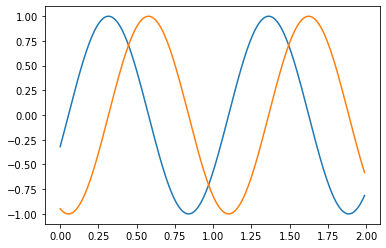

In [14]:
fig, ax = plt.subplots()
ax.plot(times, ct, times, st)
plt.show()

In [15]:
with open('Data/freepropBw.dat', 'w') as f:
    for j in range(nt):
        f.write('{:24.15e} {:24.15e} {:24.15e}\n'.format(times[j], ct[j], st[j]))